In [1]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [2]:
df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
# #df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
# #df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
# #df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

# #df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

df = df[['firstKeyword', 'keywordStrings', 'cleanFocusCategory']]

df_clean = df.copy()
df_clean = df_clean.dropna()
# df_clean['cleanKeywordStrings'] = [' '.join(map(str, l)) for l in df_clean['keywordStrings']]

In [8]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .7)
train_posts = df_clean['keywordStrings'][:train_size]
train_tags = df_clean['cleanFocusCategory'][:train_size]

test_posts = df_clean['keywordStrings'][train_size:]
test_tags = df_clean['cleanFocusCategory'][train_size:]

max_words = 20000
tokenize = text.Tokenizer(num_words=max_words, lower= True, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

#x_train = df_clean['keywordStrings'][:train_size]
#x_test = df_clean['keywordStrings'][train_size:]

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 20
epochs = 3

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

2023-03-16 12:07:24.704469: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2876840000 exceeds 10% of free system memory.


Epoch 1/10
1124/1124 [==============================] - ETA: 0s - loss: 1.4177 - accuracy: 0.6166

2023-03-16 12:09:59.811086: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 319680000 exceeds 10% of free system memory.


1124/1124 [==============================] - 150s 133ms/step - loss: 1.4177 - accuracy: 0.6166 - val_loss: 1.5844 - val_accuracy: 0.5637
Epoch 2/10
1124/1124 [==============================] - 157s 140ms/step - loss: 0.9527 - accuracy: 0.7078 - val_loss: 1.5727 - val_accuracy: 0.5702
Epoch 3/10
1124/1124 [==============================] - 144s 128ms/step - loss: 0.8141 - accuracy: 0.7387 - val_loss: 1.6047 - val_accuracy: 0.5668
Epoch 4/10
1124/1124 [==============================] - 139s 123ms/step - loss: 0.7108 - accuracy: 0.7666 - val_loss: 1.6838 - val_accuracy: 0.5619
Epoch 5/10
1124/1124 [==============================] - 140s 124ms/step - loss: 0.6314 - accuracy: 0.7902 - val_loss: 1.7716 - val_accuracy: 0.5614
Epoch 6/10
1124/1124 [==============================] - 117s 104ms/step - loss: 0.5644 - accuracy: 0.8106 - val_loss: 1.8768 - val_accuracy: 0.5533
Epoch 7/10
1124/1124 [==============================] - 110s 97ms/step - loss: 0.5084 - accuracy: 0.8278 - val_loss: 1.9739

In [18]:
x_train.shape

(79913, 10000)

In [19]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

OverflowError: cannot convert float infinity to integer

In [1]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)

df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
# #df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
# #df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
# #df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

# #df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

df = df[['firstKeyword', 'keywordStrings', 'cleanFocusCategory']]

df_clean = df.copy()
df_clean = df_clean.dropna()
# df_clean['cleanKeywordStrings'] = [' '.join(map(str, l)) for l in df_clean['keywordStrings']]

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

2023-03-16 13:41:47.087167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 13:41:47.971786: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 13:41:47.971813: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-16 13:41:50.476324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df_clean_dummy = pd.get_dummies(df_clean['cleanFocusCategory'])

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(df_clean['keywordStrings'][-30000:-1], df_clean_dummy[-30000:-1], df_clean.index[-30000:-1], test_size=0.33, random_state=0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words=None)
features_train = tfidf.fit_transform(X_train.astype(str))
#labels_train = y_train

#model.fit(features_train, labels_train)

features_test = tfidf.transform(X_test.astype(str))
#labels_test = y_test

In [6]:
features_train.shape[1]

17072

In [7]:
#train_size = int(len(df) * .7)
#train_posts = df_clean['keywordStrings'][:train_size]
#train_tags = df_clean['cleanFocusCategory'][:train_size]

#test_posts = df_clean['keywordStrings'][train_size:]
#test_tags = df_clean['cleanFocusCategory'][train_size:]

#max_words = 20000
#tokenize = text.Tokenizer(num_words=max_words, lower= True, char_level=False)
#tokenize.fit_on_texts(train_posts) # only fit on train

x_train = features_train
x_test = features_test

#x_train = df_clean['keywordStrings'][:train_size]
#x_test = df_clean['keywordStrings'][train_size:]

#encoder = LabelEncoder()
#encoder.fit(y_train)
#labels_train = df_clean_dummy[indices_train,:]
#labels_test = df_clean_dummy[indices_test,:]

#num_classes = np.max(labels_train) + 1
#y_train = utils.to_categorical(labels_train, num_classes)
#y_test = utils.to_categorical(labels_train, num_classes)

num_classes = y_train.shape[1]

batch_size = 20
epochs = 3

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(features_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train.toarray(), y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

2023-03-16 13:42:58.806878: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-16 13:42:58.807710: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-16 13:42:58.807756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a-18ira76222u8b): /proc/driver/nvidia/version does not exist
2023-03-16 13:42:58.808976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 13:43:03.177635: W tensorflow/tsl/framework/cpu_a

Epoch 1/3
905/905 [==============================] - ETA: 0s - loss: 1.8834 - accuracy: 0.5063

2023-03-16 13:47:02.512341: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 137258880 exceeds 10% of free system memory.


905/905 [==============================] - 233s 256ms/step - loss: 1.8834 - accuracy: 0.5063 - val_loss: 1.3477 - val_accuracy: 0.6219
Epoch 2/3
905/905 [==============================] - 231s 255ms/step - loss: 1.0594 - accuracy: 0.6874 - val_loss: 1.2396 - val_accuracy: 0.6279
Epoch 3/3
905/905 [==============================] - 223s 246ms/step - loss: 0.7433 - accuracy: 0.7665 - val_loss: 1.2606 - val_accuracy: 0.6249


In [8]:
score = model.evaluate(x_test.toarray(), y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

2023-03-16 13:55:36.963296: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 676051200 exceeds 10% of free system memory.


495/495 [==============================] - 13s 26ms/step - loss: 1.2875 - accuracy: 0.6154
Test accuracy: 0.615353524684906


In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

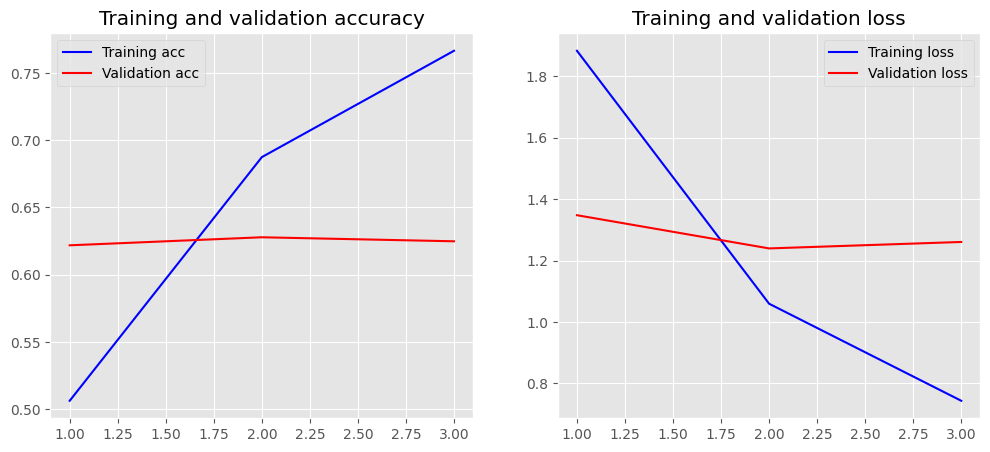

In [12]:
plot_history(history)